In [1]:
import numpy as np
import open3d as o3d
import os



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## npy文件读取

In [55]:
npy_dir = rf"D:\doc\博士阶段\成果\1论文\2024-2025\1\images\chapter2\dalian_xinghaiwandaqiao_video_input_rgba_txt_file_camera_crop_OPTICS_lambda_dist=100\outputs\based_on_2d_npy_file_edge2\hit_points_from_2d_npy_with_markers\0032.npy"
npy_cls_dir = rf"D:\doc\博士阶段\成果\1论文\2024-2025\1\images\chapter2\dalian_xinghaiwandaqiao_video_input_rgba_txt_file_camera_crop_OPTICS_lambda_dist=100\outputs\img_point_width_new_segmentation1\cls_num_mask_points\0032.npy"
npy_dir_img = rf"D:\project\code\from_git\image-to-3d-tradition-sfm\3DGS\2d-gaussian-splatting-main_self\datasets\dalian_xinghaiwandaqiao_video_input_rgba\img_point_width_new_segmentation2\edge_skel_edge_pair\cls_num_edge_to_calculate_mid_axis_dict\0032.npy"

npy_data = np.load(npy_dir, allow_pickle=True).tolist()
npy_cls_data = np.load(npy_cls_dir, allow_pickle=True).tolist()
npy_img_data = np.load(npy_dir_img, allow_pickle=True).tolist()

npy_data.keys(), npy_cls_data.keys(), npy_dir_img

(dict_keys(['all_points_list', 'all_colors_list', 'only_defects_cls_length', 'each_cls_num_points', 'each_cls_colors', 'cls_dist_each_3d_point_dict', 'cls_center_points_dict', 'mmp3dp']),
 dict_keys([1, 2]),
 'D:\\project\\code\\from_git\\image-to-3d-tradition-sfm\\3DGS\\2d-gaussian-splatting-main_self\\datasets\\dalian_xinghaiwandaqiao_video_input_rgba\\img_point_width_new_segmentation2\\edge_skel_edge_pair\\cls_num_edge_to_calculate_mid_axis_dict\\0032.npy')

In [14]:
print(npy_data['cls_dist_each_3d_point_dict'].keys())

datas = npy_data['cls_dist_each_3d_point_dict'][2]
print(len(datas), len(datas[0]))

dict_keys([1, 2])


(12, 11)

In [50]:
print(npy_data['each_cls_num_points'].keys())

datas = npy_data['each_cls_num_points'][1]
print(len(datas), len(datas[0]), len(datas[0][0]))
print(type(npy_data['each_cls_num_points']))
sum = 0
# 字典循环
for k, i in npy_data['each_cls_num_points'].items():
    # print(k, i)
    for j in i:
        sum += len(j)
print(sum)

dict_keys([1, 2])
34 656 3
<class 'dict'>
7414


## npy文件读取局部点云并计算面积

In [64]:
cls_select = 2
num_select = 11

points_select_list = npy_data['each_cls_num_points'][cls_select][num_select]
colors_select_type_list = npy_data['each_cls_colors'][cls_select][num_select]

points_select = np.array(points_select_list)
colors_select_type = np.array(colors_select_type_list)
colors_select = np.zeros((points_select.shape[0], 3))
colors_select[:, cls_select-1] = colors_select_type[0]

print(points_select.shape)
print(colors_select.shape)
# open3d展示
import open3d as o3d
pcd_select = o3d.geometry.PointCloud()
pcd_select.points = o3d.utility.Vector3dVector(points_select)
pcd_select.colors = o3d.utility.Vector3dVector(colors_select)
# o3d.visualization.draw_geometries([pcd_select])



# 展示点云
# o3d.visualization.draw_geometries([pcd_select])
# 设置点云背景和点大小
vis_select = o3d.visualization.Visualizer()
vis_select.create_window()
vis_select.add_geometry(pcd_select)


# vis.get_render_option().show_coordinate_frame = True
# vis.get_render_option().background_color = np.array([1, 1, 1])
vis_select.get_render_option().background_color = np.array([1, 1, 1])
vis_select.get_render_option().point_size = 5

vis_select.run()
vis_select.destroy_window()


(116, 3)
(116, 3)


## npy文件读选取的ply文件的取局部点云并计算面积 （用此）

### 读取mesh的点

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import trimesh
import open3d as o3d

# #读取mesh
mesh_dir = rf"D:\doc\博士阶段\成果\1论文\2024-2025\1\images\chapter2\dalian_xinghaiwandaqiao_video_input_rgba_txt_file_camera_crop_OPTICS_lambda_dist=100\train\ours_30000\fuse_post.ply"
mesh = o3d.io.read_triangle_mesh(mesh_dir)
# 选择在points_ply中的mesh
points_all_np = np.array(mesh.vertices)
print('points_all_np.shape', points_all_np.shape)
# 颜色
colors_all_np = np.array(mesh.vertex_colors)
print('colors_all_np.shape', colors_all_np.shape)

# open3d显示
# o3d.visualization.draw_geometries([mesh])

pcd_all_ply = o3d.geometry.PointCloud()
pcd_all_ply.points = o3d.utility.Vector3dVector(points_all_np)
# pcd_ply.colors = o3d.utility.Vector3dVector(colors_ply[:, :3])
pcd_all_ply.colors = o3d.utility.Vector3dVector(colors_all_np)
# o3d.visualization.draw_geometries([pcd_all_ply])

vis = o3d.visualization.Visualizer()
vis.create_window()

vis.get_render_option().background_color = np.array([0, 0, 0])
vis.get_render_option().point_size = 5.0
vis.add_geometry(pcd_all_ply)
vis.run()
vis.destroy_window()


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
points_all_np.shape (912178, 3)
colors_all_np.shape (912178, 3)


In [22]:
ply_selected_dir = rf"D:\project\code\from_git\image-to-3d-tradition-sfm\3DGS\2d-gaussian-splatting-main_self\tools\output_plt_txt\0032\\0032_selected_spalling_1.ply"
selected_defect_boundary = o3d.io.read_triangle_mesh(ply_selected_dir)
selected_defect_boundary_points = np.asarray(selected_defect_boundary.vertices)
selected_defect_boundary_colors = np.asarray(selected_defect_boundary.vertex_colors)

selected_defect_boundary_o3d = o3d.utility.Vector3dVector(selected_defect_boundary_points)
selected_defect_boundary_colors_o3d = o3d.utility.Vector3dVector(selected_defect_boundary_colors)





[Open3D WARNING] geometry::TriangleMesh appears to be a geometry::PointCloud (only contains vertices, but no triangles).


### 1、ConvexHull和Delaunay选择在边界范围内网格的点

In [17]:
import numpy as np
from scipy.spatial import ConvexHull, Delaunay

# def find_points_inside(a, b):
#     # 步骤1: 计算a的凸包
#     hull = ConvexHull(a, incremental=True)  # a是numpy数组，形状为(m, 3)
    
#     # 获取凸包的面和法向量
#     # hull.equations 返回每个面的方程: [n_x, n_y, n_z, offset]
#     # 法向量 (n_x, n_y, n_z) 指向外部，面上点满足 n·v + offset = 0
#     equations = hull.equations  # 形状为(f, 4)
#     print('equations.shape:', equations.shape)
#     normals = equations[:, :3]  # 法向量
#     offsets = equations[:, 3]   # 偏移量
    
#     # 步骤2: 点包容测试
#     inside_points = []
#     for point in b:  # point是三维坐标
#         # 检查点是否在所有面的负半空间
#         inside = True
#         for i in range(len(equations)):
#             # 计算 (point - v_i) · n_i 等价于 n_i · point + offset (因为 v_i 在面上满足 n_i·v_i = -offset)
#             # 公式: (point - v_i) · n_i = n_i · point - n_i · v_i = n_i · point + offset
#             value = np.dot(normals[i], point) + offsets[i]
#             if value > 1e-6:  # 考虑浮点误差，>0 表示在外部
#                 inside = False
#                 break
#         if inside:
#             inside_points.append(point)
    
#     return np.array(inside_points)  # 返回b中在内部的点集



# a: Nx3 array of boundary points
# b: Mx3 array of candidate points
# 1.凸包法求解，返回b中在凸包内的点集
def find_points_inside_tu(a, b):
    hull = ConvexHull(a)
    delaunay = Delaunay(a[hull.vertices])  # Use convex hull vertices to define the region
    mask = delaunay.find_simplex(b) >= 0
    return b[mask]  # 返回 b 中在 hull 内的点

# 示例
# a = np.array([...])  # Nx3 array
# b = np.array([...])  # Mx3 array
# inside_points = points_in_hull(a, b)

# 2.凹包法求解，返回b中在凹包内的点集
def generate_faces_from_points(a):
    hull = ConvexHull(a)
    faces = hull.simplices  # 每一行是三个点索引，构成一个三角面
    return a, faces  # 返回点和对应面索引

def find_points_inside_ao(a_points, a_faces, b):
    mesh = trimesh.Trimesh(vertices=a_points, faces=a_faces, process=True)
    mask = mesh.contains(b)
    return b[mask]
# 示例

# 示例用法
# a: 边界点集，形状(m, 3)
# b: 查询点集，形状(n, 3)
# result = find_points_inside(a, b)
# 1.凸包法求解
results_tu = find_points_inside_tu(selected_defect_boundary_points, points_all_np)
# 2.凹包法求解
org_points, selected_defect_faces = generate_faces_from_points(selected_defect_boundary_points)
results_tu_ao = find_points_inside_ao(selected_defect_boundary_points, selected_defect_faces, points_all_np)
# results1 = find_points_inside(selected_defect_boundary_points, results)


In [18]:
def show_mesh_open3d(vertices, faces):
    # 创建 TriangleMesh
    mesh = o3d.geometry.TriangleMesh()

    # 顶点坐标（转换为Open3D格式）
    mesh.vertices = o3d.utility.Vector3dVector(vertices)

    # 面片索引（faces）
    mesh.triangles = o3d.utility.Vector3iVector(faces)

    # 可选：计算法线
    mesh.compute_vertex_normals()

    # 显示
    o3d.visualization.draw_geometries([mesh])

show_mesh_open3d(org_points, selected_defect_faces)

In [22]:
import numpy as np
from scipy.spatial import ConvexHull
import open3d as o3d

# Step 1: 生成面片（faces）
def generate_faces_from_points(a):
    hull = ConvexHull(a)
    faces = hull.simplices  # 每一行是三个顶点索引
    return a, faces

# Step 2: 用 Open3D 显示 mesh
def show_mesh_open3d(vertices, faces):
    # 创建 TriangleMesh
    mesh = o3d.geometry.TriangleMesh()

    # 顶点坐标（转换为Open3D格式）
    mesh.vertices = o3d.utility.Vector3dVector(vertices)

    # 面片索引（faces）
    mesh.triangles = o3d.utility.Vector3iVector(faces)

    # 可选：计算法线
    mesh.compute_vertex_normals()

    # 显示
    o3d.visualization.draw_geometries([mesh])

# 示例数据（你应使用自己的点集 a）
# a = np.random.rand(30, 3)
# 或者用你的真实数据
# a = np.loadtxt("your_points.txt")

# 示例运行
a = np.random.rand(50, 3)
vertices, faces = generate_faces_from_points(a)
show_mesh_open3d(vertices, faces)


In [10]:
results_tu.shape, results_tu_ao.shape

((1233, 3), (1233, 3))

In [26]:
# 展示results
results_o3d = o3d.geometry.PointCloud()
results_o3d.points = o3d.utility.Vector3dVector(results_tu)
results_colors = np.zeros((len(results_tu), 3))
# results_colors[:, 0] = 0
results_colors[:, 1] = 0.5
# results_colors[:, 2] = 0
results_o3d.colors = o3d.utility.Vector3dVector(results_colors)

selected_defect_boundary_colors_new = np.zeros((len(selected_defect_boundary_points), 3))
selected_defect_boundary_colors_new[:, 0] = 0
selected_defect_boundary_colors_new[:, 1] = 0.5
selected_defect_boundary_colors_new[:, 2] = 0

all_points = np.vstack((results_tu, selected_defect_boundary_points))
all_colors = np.vstack((results_colors, selected_defect_boundary_colors_new))

selected_defect_o3d = o3d.geometry.PointCloud()
selected_defect_o3d.points = o3d.utility.Vector3dVector(all_points)
selected_defect_o3d.colors = o3d.utility.Vector3dVector(all_colors)

o3d.visualization.draw_geometries([selected_defect_o3d])

# o3d.visualization.draw_geometries([results_o3d, selected_defect_o3d])

save_processed_dir = 'save_refined_results_for_defects'
os.makedirs(save_processed_dir, exist_ok=True)
file_name = ply_selected_dir.split(rf"\\")[-1].split(".")[0]
o3d.io.write_point_cloud(os.path.join(save_processed_dir, f'{file_name}_refined.ply'), selected_defect_o3d)

True

In [33]:
# 读取ply文件并计算面积
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

# 读取ply文件
processed_ply_dir = rf"D:\project\code\from_git\image-to-3d-tradition-sfm\3DGS\2d-gaussian-splatting-main_self\tools\save_refined_results_for_defects\0032_selected_spalling_1_refined.ply"
pcd = o3d.io.read_point_cloud(processed_ply_dir)
processed_points = np.asarray(pcd.points)
processed_colors = np.asarray(pcd.colors)

# 计算面积
triangles = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, 0.05)
area = triangles.get_surface_area()
print("Area of the mesh is:", area)

# 展示triangles
o3d.visualization.draw_geometries([triangles])

# 展示损伤边界
# defect_boundary = o3d.geometry.LineSet.create_from_point_cloud_correspondences(pcd, triangles)
# o3d.visualization.draw_geometries([defect_boundary])

# # 展示网格
# grid = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])
# o3d.visualization.draw_geometries([grid])



Area of the mesh is: 0.15278135111938862


### 2、凸优化后进行三角的面积计算

点集大小: 1842 points
警告：点集不严格共面，结果将是近似值
总三角形数: 3309
有效三角形数: 3238 (面积 ≤ 0.000145)
过滤三角形数: 71 (面积 > 0.000145)
计算表面积: 0.098343


C:\Users\1\AppData\Local\Temp\ipykernel_23732\3535686521.py:140: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\3535686521.py:140: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\3535686521.py:140: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\3535686521.py:140: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\3535686521.py:140: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\3535686521.py:140: UserWarning: Glyph 21078 (\N{CJK UNIFIED IDEO

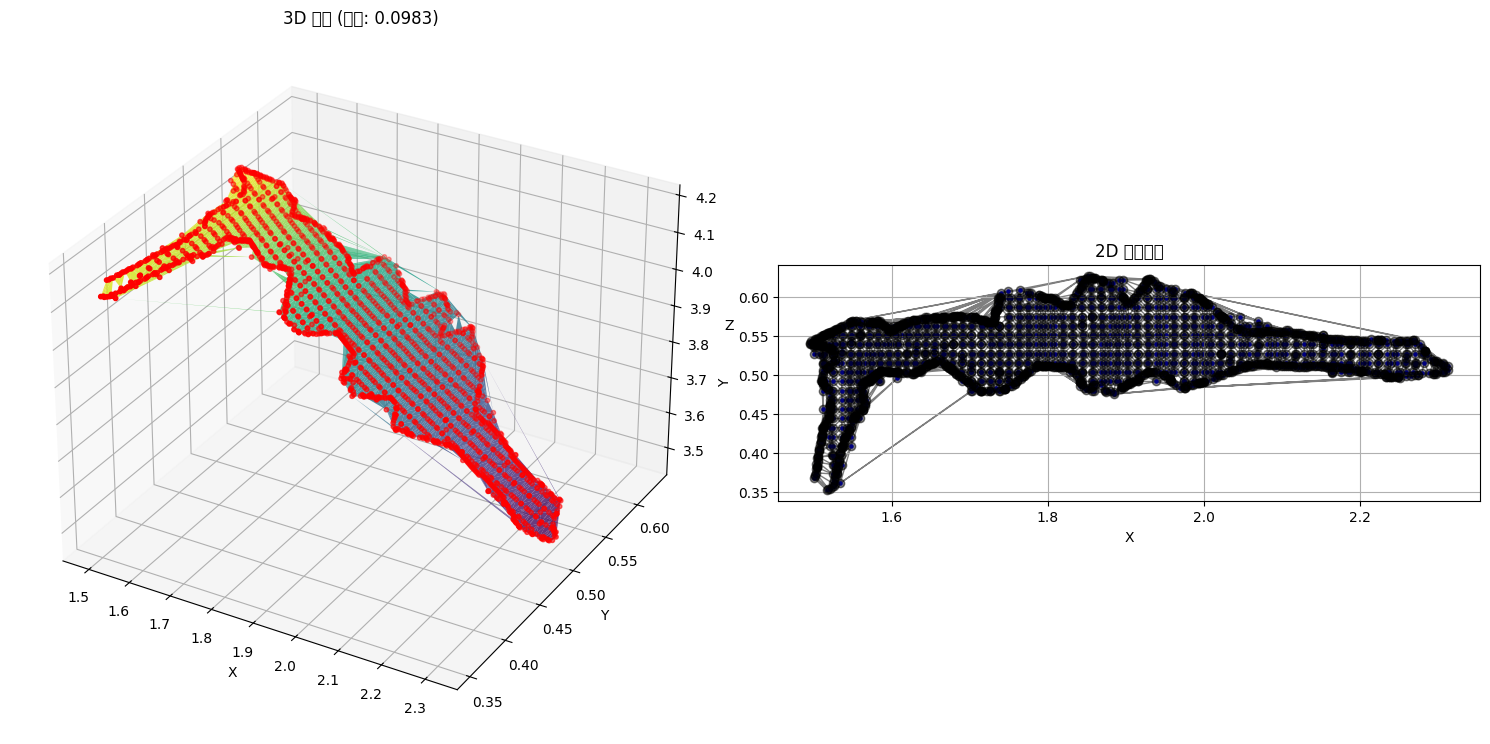

In [77]:
# deepseek方法
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_surface_area(points, max_triangle_area=0.5):
    """
    计算三维点集的表面积（点集趋近于平面）
    
    参数:
        points: 三维点集，形状为(n, 3)的numpy数组
        
    返回:
        total_area: 表面积
        triangles: 三角剖分结果（索引数组）
    """
    # 1. 检查点集是否共面（近似）
    if not is_nearly_coplanar(points):
        print("警告：点集不严格共面，结果将是近似值")
    
    # 2. 找到最佳投影平面（使用PCA）
    projected_points, normal_vector = project_to_2d(points)
    
    # 3. 在二维投影上进行Delaunay三角剖分
    tri = Delaunay(projected_points)
    
    # 4. 提取三角形索引
    triangles = tri.simplices
    
    # 5. 计算每个三角形的面积（使用三维坐标）
    total_area = 0.0
    valid_triangles = []
    large_triangles = []
    for triangle in triangles:
        # 获取三角形的三个顶点
        A, B, C = points[triangle]
        
        # 计算向量AB和AC
        AB = B - A
        AC = C - A
        
        # 计算叉积（法向量）
        cross_product = np.cross(AB, AC)
        
        # 计算三角形面积（叉积模长的一半）
        area = 0.5 * np.linalg.norm(cross_product)
        # 检查面积是否大于阈值
        if area <= max_triangle_area:
            total_area += area
            valid_triangles.append(triangle)
        else:
            large_triangles.append(triangle)
        # total_area += area
    # 转换为numpy数组
    valid_triangles = np.array(valid_triangles) if valid_triangles else np.array([])
    large_triangles = np.array(large_triangles) if large_triangles else np.array([])
    
    # 打印统计信息
    print(f"总三角形数: {len(triangles)}")
    print(f"有效三角形数: {len(valid_triangles)} (面积 ≤ {max_triangle_area})")
    print(f"过滤三角形数: {len(large_triangles)} (面积 > {max_triangle_area})")
    return total_area, triangles, valid_triangles, large_triangles

def is_nearly_coplanar(points, tolerance=1e-6):
    """
    检查点集是否近似共面
    """
    if len(points) < 4:
        return True  # 3个或更少的点总是共面
    
    # 计算协方差矩阵
    centered = points - np.mean(points, axis=0)
    covariance = np.cov(centered, rowvar=False)
    
    # 计算特征值
    eigenvalues = np.linalg.eigvalsh(covariance)
    
    # 最小特征值接近0表示共面
    return eigenvalues[0] < tolerance

def project_to_2d(points):
    """
    使用PCA将三维点投影到最佳二维平面
    """
    # 中心化数据
    centroid = np.mean(points, axis=0)
    centered_points = points - centroid
    
    # 计算协方差矩阵
    covariance = np.cov(centered_points, rowvar=False)
    
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    
    # 获取主成分（按特征值降序排列）
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # 前两个主成分定义投影平面
    basis = eigenvectors[:, :2]
    normal_vector = eigenvectors[:, 2]  # 法向量（第三个主成分）
    
    # 投影到二维平面
    projected_points = centered_points @ basis
    
    return projected_points, normal_vector

def visualize_results(points, triangles, area):
    """
    可视化点集和三角剖分结果
    """
    fig = plt.figure(figsize=(15, 10))
    
    # 3D可视化
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], 
                    triangles=triangles, 
                    alpha=0.8, 
                    cmap='viridis',
                    edgecolor=None)
                    # edgecolor='k')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], 
               c='red', s=10, depthshade=True)
    ax1.set_title(f'3D 表面 (面积: {area:.4f})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # 二维投影可视化
    ax2 = fig.add_subplot(122)
    ax2.triplot(points[:, 0], points[:, 1], triangles, 'ko-', lw=1, alpha=0.5, picker=True)
    ax2.scatter(points[:, 0], points[:, 1], c='blue', s=5)
    ax2.set_title('2D 三角剖分')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_aspect('equal')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()



# 主程序
if __name__ == "__main__":
    # 生成样本点集（趋近于平面）
    # points = generate_sample_points(shape='curved', num_points=100)
    points = processed_points
    
    print(f"点集大小: {points.shape[0]} points")
    
    # 计算表面积
    max_triangle_area = 0.000145  # 面积阈值
    area, triangles, valid_triangles, large_triangles = calculate_surface_area(points, max_triangle_area=max_triangle_area)
    print(f"计算表面积: {area:.6f}")
    
    # 可视化结果
    visualize_results(points, valid_triangles, area)
    
    # 保存结果
    # np.savetxt("points.csv", points, delimiter=",", header="x,y,z")
    # print("点集已保存为points.csv")

In [38]:
triangles

array([[1573, 1443,  977],
       [1443, 1437,  977],
       [1134, 1135, 1133],
       ...,
       [1718, 1720,  192],
       [1718, 1716,  194],
       [1720, 1718,  194]], dtype=int32)

In [11]:
results_o3d_tu_ao = o3d.geometry.PointCloud()
results_o3d_tu_ao.points = o3d.utility.Vector3dVector(results_tu_ao)
results_o3d_tu_ao.paint_uniform_color([1, 0, 0])

selected_defect_o3d = o3d.geometry.PointCloud()
selected_defect_o3d.points = o3d.utility.Vector3dVector(selected_defect_boundary_points)
selected_defect_o3d.colors = o3d.utility.Vector3dVector(selected_defect_boundary_colors)
o3d.visualization.draw_geometries([results_o3d_tu_ao, selected_defect_o3d])

In [26]:
points_all_np.shape

(912178, 3)

In [34]:
import numpy as np
import os
import matplotlib.pyplot as plt
import trimesh
import open3d as o3d

ply_selected_dir = rf"D:\project\code\from_git\image-to-3d-tradition-sfm\3DGS\2d-gaussian-splatting-main_self\tools\output_plt_txt\0032\0032_selected_spalling_1.ply"

# #读取mesh
mesh_dir = rf"D:\doc\博士阶段\成果\1论文\2024-2025\1\images\chapter2\dalian_xinghaiwandaqiao_video_input_rgba_txt_file_camera_crop_OPTICS_lambda_dist=100\train\ours_30000\fuse_post.ply"
mesh = o3d.io.read_triangle_mesh(mesh_dir)
# 选择在points_select_ply中的mesh
points_select_all_ply = np.array(mesh.vertices)
print('points_select_all_ply.shape', points_select_all_ply.shape)




cls_num = 2

# 读取ply文件
mesh = trimesh.load(ply_selected_dir)
points_select_ply = np.array(mesh.vertices)
# colors_select_ply = np.array(mesh.visual.vertex_colors)
# 将[0, 128, 0]保持和point_select_ply形状一致

colors_select_ply = np.zeros((points_select_ply.shape[0], 3))
colors_select_ply[:, cls_num-1] = 0.5

print(points_select_ply.shape)
print(colors_select_ply.shape, colors_select_ply)

pcd_select_ply = o3d.geometry.PointCloud()
pcd_select_ply.points = o3d.utility.Vector3dVector(points_select_ply)
# pcd_select_ply.colors = o3d.utility.Vector3dVector(colors_select_ply[:, :3])
pcd_select_ply.colors = o3d.utility.Vector3dVector(colors_select_ply)
# o3d.visualization.draw_geometries([pcd_select_ply])


# points_select_all_ply_o3d = o3d.utility.Vector3dVector(points_select_all_ply)

# 展示点云
# o3d.visualization.draw_geometries([pcd_select_ply])
# 设置点云背景和点大小
vis_select_ply = o3d.visualization.Visualizer()
vis_select_ply.create_window()
vis_select_ply.add_geometry(pcd_select_ply)
# vis_select_ply.add_geometry(points_select_all_ply_o3d)


# vis.get_render_option().show_coordinate_frame = True
# vis.get_render_option().background_color = np.array([1, 1, 1])
vis_select_ply.get_render_option().background_color = np.array([0, 0, 0])
vis_select_ply.get_render_option().point_size = 5

vis_select_ply.run()
vis_select_ply.destroy_window()


points_select_all_ply.shape (912178, 3)
(865, 3)
(865, 3) [[0.  0.5 0. ]
 [0.  0.5 0. ]
 [0.  0.5 0. ]
 ...
 [0.  0.5 0. ]
 [0.  0.5 0. ]
 [0.  0.5 0. ]]


## ply的mesh文件读取所有

In [3]:
#open3d
import open3d as o3d


#读取mesh
mesh_dir = rf"D:\doc\博士阶段\成果\1论文\2024-2025\1\images\chapter2\dalian_xinghaiwandaqiao_video_input_rgba_txt_file_camera_crop_OPTICS_lambda_dist=100\train\ours_30000\fuse_post.ply"
mesh = o3d.io.read_triangle_mesh(mesh_dir)

## 融合总体npy和mesh

In [4]:
def read_all_points_and_colors_npy(npy_dir):
    points_all_list = []
    colors_all_list = []
    for npy_file in os.listdir(npy_dir):
        if npy_file.endswith('.npy'):
            data = np.load(os.path.join(npy_dir, npy_file), allow_pickle=True).tolist()
            # print('data:',data)
            # print("data['all_points_list']:",data.keys())
            points_all_list.append(data['all_points_list'])
            colors_all_list.append(data['all_colors_list'])
    return np.vstack(points_all_list), np.vstack(colors_all_list)

npy_dir = rf"D:\doc\博士阶段\成果\1论文\2024-2025\1\images\chapter2\dalian_xinghaiwandaqiao_video_input_rgba_txt_file_camera_crop_OPTICS_lambda_dist=100\outputs\based_on_2d_npy_file_edge2\hit_points_from_2d_npy_with_markers"
all_points_np, all_colors_np = read_all_points_and_colors_npy(npy_dir)
all_points_np.shape, all_colors_np.shape

((13306, 3), (13306, 3))

In [5]:
# all_points_list = npy_data['all_points_list']
# all_colors_list = npy_data['all_colors_list']

# points = np.array(all_points_list)
# colors = np.array(all_colors_list)
# print("points shape:", points.shape)
# print("colors shape:", colors.shape)

# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points)
# pcd.colors = o3d.utility.Vector3dVector(colors)

range_size_from = 10690 # 1536, 4794, 7414为3个图的点(6330后面的点是0032.jpg图的点)
range_size_to = 11500

pcd = o3d.geometry.PointCloud()

# pcd.points = o3d.utility.Vector3dVector(all_points_np[range_size_from: range_size_to])
# pcd.colors = o3d.utility.Vector3dVector(all_colors_np[range_size_from: range_size_to])
pcd.points = o3d.utility.Vector3dVector(all_points_np)
pcd.colors = o3d.utility.Vector3dVector(all_colors_np)


# 展示点云
# o3d.visualization.draw_geometries([pcd])
# 设置点云背景和点大小
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
# vis.add_geometry(mesh)

vis.get_render_option().show_coordinate_frame = True
# vis.get_render_option().background_color = np.array([1, 1, 1])
vis.get_render_option().background_color = np.array([0, 0, 0])
vis.get_render_option().point_size = 5

vis.run()
vis.destroy_window()

img_name = '0032'
save_ply_txt_dir = rf"output_plt_txt\{img_name}"
os.makedirs(save_ply_txt_dir, exist_ok=True)

# 保存点云
o3d.io.write_point_cloud(os.path.join(save_ply_txt_dir, rf"{img_name}.ply"), pcd)

# 保存点云的txt文件
np.savetxt(os.path.join(save_ply_txt_dir, rf"{img_name}.txt"), np.hstack((all_points_np, all_colors_np)), fmt='%f %f %f %f %f %f')

# 计算面积
# #compute area
# area = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha=0.05).get_area()
# print("Area of the object is:", area)

## 融合npy_cls和mesh

In [29]:
def read_npy_cls_data(npy_path):
    npy_cls_data = np.load(npy_path, allow_pickle=True).tolist()
    cls_list = npy_cls_data.keys()

    points_list = []
    cls_points_list = []
    for cls_type in cls_list:
        npy_cls_points_list = npy_cls_data[cls_type]
        cls_points_list.append(npy_cls_points_list)
        points_each_cls = np.vstack(npy_cls_points_list)
        points_list.append(points_each_cls)
        # colors_each_cls = np.vstack(npy_cls_data[cls_type])
        print(cls_type, points_each_cls.shape)
    points = np.concatenate(points_list)
    print("total points:", points.shape)
    return cls_points_list, points, points_list

cls_points_list, points_all, points_list = read_npy_cls_data(npy_cls_dir)
points_all.shape, points_all[:20], np.where(points_all == 1591), points_all[6889], points_all[9721]

1 (10775, 2)
2 (43831, 2)
total points: (54606, 2)


((54606, 2),
 array([[  4, 616],
        [  4, 617],
        [  4, 618],
        [  4, 619],
        [  4, 620],
        [  4, 621],
        [  4, 622],
        [  4, 623],
        [  4, 624],
        [  4, 625],
        [  4, 626],
        [  4, 627],
        [  5, 598],
        [  5, 612],
        [  5, 613],
        [  5, 614],
        [  5, 615],
        [  5, 616],
        [  5, 617],
        [  5, 618]], dtype=int64),
 (array([6889, 9678, 9721, 9764, 9809], dtype=int64),
  array([1, 1, 1, 1, 1], dtype=int64)),
 array([ 412, 1591], dtype=int64),
 array([ 975, 1591], dtype=int64))

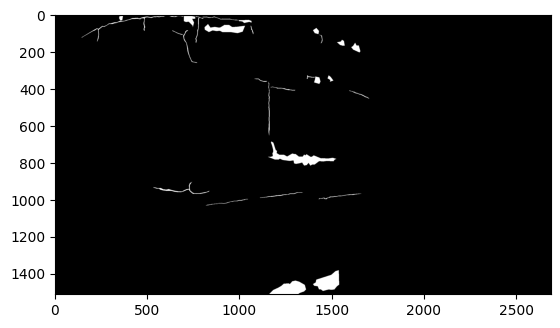

In [30]:
from matplotlib import pyplot as plt
import numpy as np

# np_zero = np.zeros((2688, 1512))
np_zero = np.zeros((1512, 2688))
np_zero[points_all[:, 0], points_all[:, 1]]=255
plt.imshow(np_zero, cmap='gray')
plt.show()

In [18]:
# [1,0,0]转为[[1,0,0],[1,0,0]]
re = np.tile([1,0,0],(2,1))
print(re)

[[1 0 0]
 [1 0 0]]


In [32]:
np.tile([1,0,0],(points_list[0].shape[0],1)).shape

(10775, 3)

In [34]:
np.concatenate((np.tile([1,0,0],(points_list[0].shape[0],1)), np.tile([0,1,0],(points_list[1].shape[0],1))))

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [42]:

points = points_all
colors = np.concatenate((np.tile([1,0,0],(points_list[0].shape[0],1)), np.tile([0,1,0],(points_list[1].shape[0],1))))

print("points shape:", points.shape)
print("colors shape:", colors.shape)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# 展示点云
# o3d.visualization.draw_geometries([pcd])
# 设置点云背景和点大小
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
vis.add_geometry(mesh)

vis.get_render_option().show_coordinate_frame = True
vis.get_render_option().background_color = np.array([1, 1, 1])
vis.get_render_option().point_size = 3
vis.run()
vis.destroy_window()


points shape: (54606, 2)
colors shape: (54606, 3)


RuntimeError: Unable to cast Python instance of type <class 'numpy.ndarray'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

# !! 后面都是测试用的草稿

In [8]:
import numpy as np
import open3d as o3d

def find_points_inside(a, b):
    """
    找到b中位于a边界内部的所有点
    支持凸和凹形状
    
    参数:
        a: 边界点集 (numpy数组, shape=(m, 3))
        b: 查询点集 (numpy数组, shape=(n, 3))
    
    返回:
        inside_points: b中在a边界内部的点 (numpy数组)
    """
    # 1. 将点集转换为Open3D点云
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(a)
    
    # 2. 估计法向量（表面重建所需）
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(
        radius=0.1,  # 根据点间距调整
        max_nn=30))
    
    # 3. 表面重建 - 使用泊松重建算法
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
        pcd, 
        depth=9)  # 控制重建细节，值越大细节越多
    
    # 4. 创建用于点包容测试的场景
    scene = o3d.t.geometry.RaycastingScene()
    mesh_t = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
    scene.add_triangles(mesh_t)
    
    # 5. 将查询点转换为张量
    query_points = o3d.core.Tensor(b, dtype=o3d.core.Dtype.Float32)
    
    # 6. 计算有符号距离（负值表示内部）
    signed_distances = scene.compute_signed_distance(query_points)
    
    # 7. 提取内部点（距离 < 0）
    inside_mask = signed_distances.numpy() < 0
    inside_points = b[inside_mask]
    
    return inside_points, mesh

# 使用示例
if __name__ == "__main__":
    # 生成示例数据
    # a: 边界点集（包含凸和凹形状）
    # b: 查询点集
    
    # 示例1：简单立方体（凸）
    cube_points = np.array([
        [0,0,0], [1,0,0], [1,1,0], [0,1,0],
        [0,0,1], [1,0,1], [1,1,1], [0,1,1]
    ])
    
    # 示例2：添加凹形（L形）
    L_shape = np.array([
        # 底部
        [2,0,0], [3,0,0], [3,1,0], [2,1,0],
        [2,0,1], [3,0,1], [3,1,1], [2,1,1],
        # 凹部
        [2.2,0.2,0.2], [2.2,0.8,0.2], [2.8,0.8,0.2], [2.8,0.2,0.2],
        [2.2,0.2,0.8], [2.2,0.8,0.8], [2.8,0.8,0.8], [2.8,0.2,0.8]
    ])
    
    # 组合边界点
    a = np.vstack([cube_points, L_shape])
    
    # 生成随机查询点
    np.random.seed(42)
    b = np.random.rand(1000, 3) * 4 - 1  # [-1, 3]范围
    
    # 计算内部点
    inside_points, mesh = find_points_inside(a, b)
    
    print(f"总查询点数: {len(b)}")
    print(f"内部点数: {len(inside_points)}")
    
    # 可视化结果（可选）
    pcd_b = o3d.geometry.PointCloud()
    pcd_b.points = o3d.utility.Vector3dVector(b)
    pcd_b.colors = o3d.utility.Vector3dVector(np.tile([0.5, 0.5, 0.5], (len(b), 1)))  # 灰色
    
    pcd_inside = o3d.geometry.PointCloud()
    pcd_inside.points = o3d.utility.Vector3dVector(inside_points)
    pcd_inside.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (len(inside_points), 1)))  # 红色
    
    # 显示边界点
    pcd_a = o3d.geometry.PointCloud()
    pcd_a.points = o3d.utility.Vector3dVector(a)
    pcd_a.paint_uniform_color([0, 1, 0])  # 绿色
    
    # o3d.visualization.draw_geometries([pcd_a, pcd_b, pcd_inside])
    o3d.visualization.draw_geometries([pcd_inside])

    # 显示重建的网格
    # mesh.compute_vertex_normals()
    # mesh.paint_uniform_color([0.3, 0.3, 1])
    
    # o3d.visualization.draw_geometries([pcd_a, mesh, pcd_b, pcd_inside])

总查询点数: 1000
内部点数: 167


边界点数: 865
查询点数: 912178


C:\Users\1\AppData\Local\Temp\ipykernel_23732\3646335548.py:187: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\3646335548.py:187: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\3646335548.py:187: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


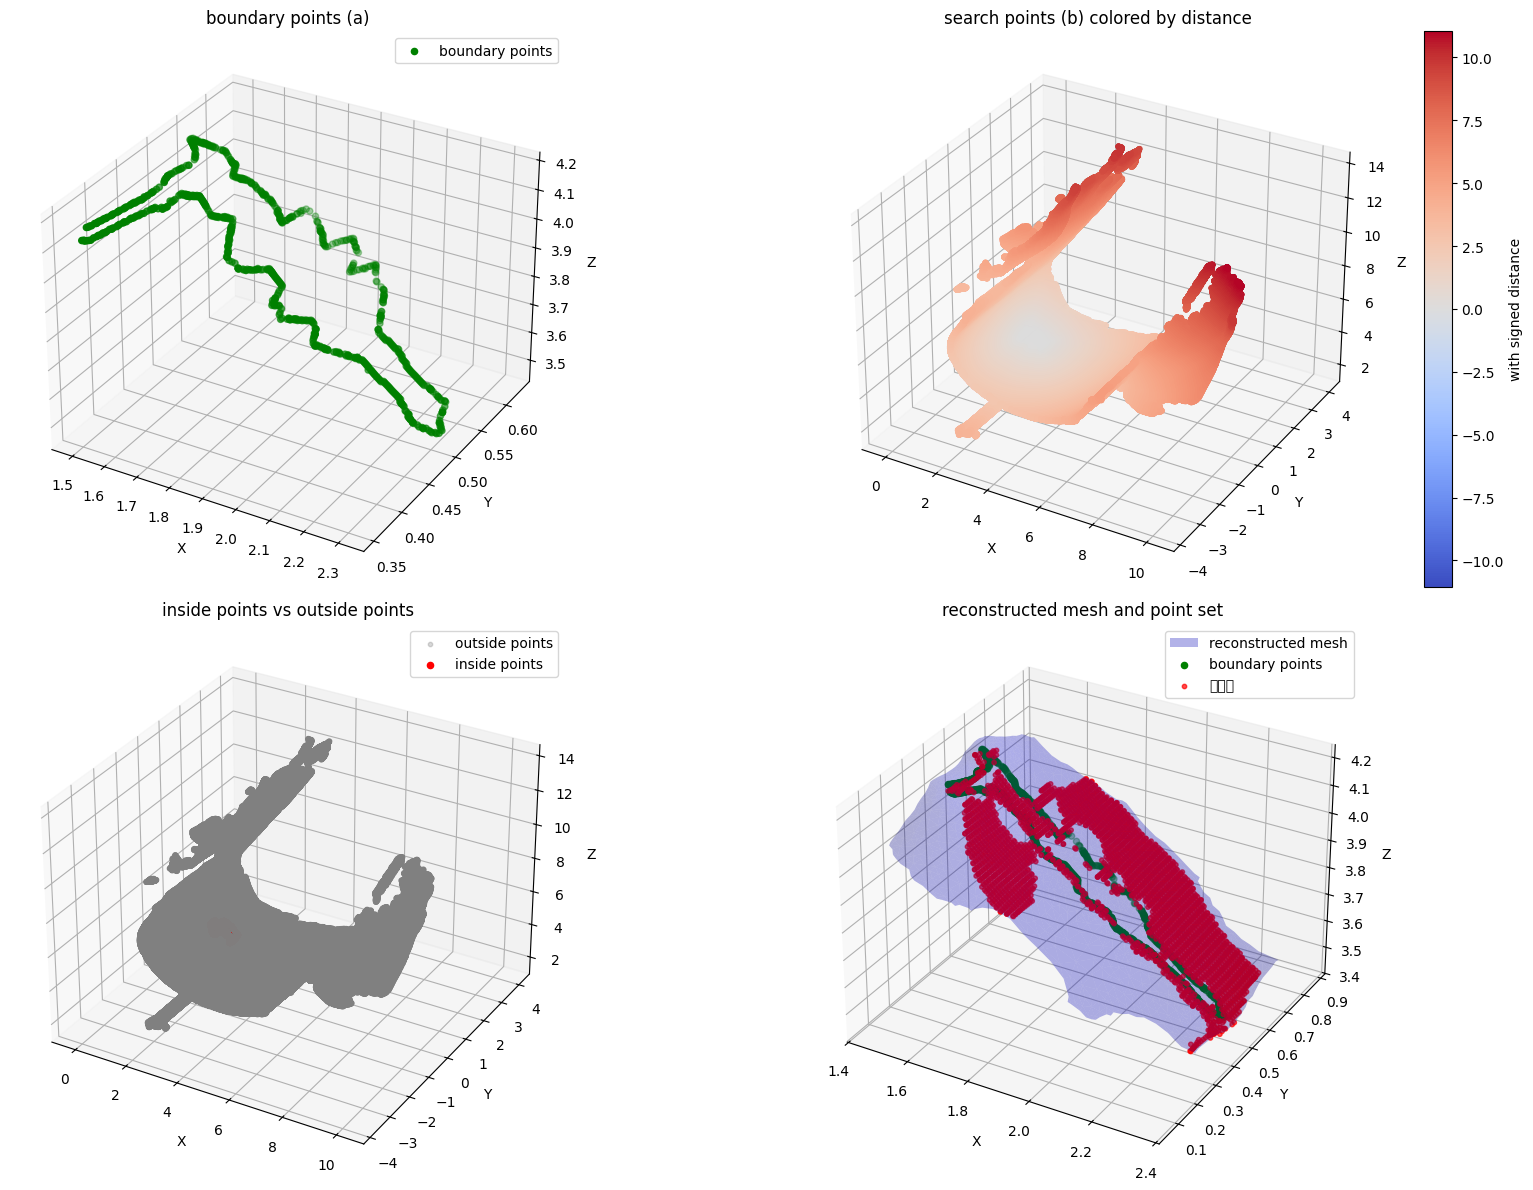

计算完成，耗时: 43.02秒
内部点数量: 3053


In [16]:
import numpy as np
import open3d as o3d
import time
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def reconstruct_surface_from_boundary(a, method='poisson', visualize=False):
    """
    从边界点重建表面网格
    
    参数:
        a: 边界点集 (numpy数组, shape=(m, 3))
        method: 重建方法 ('poisson', 'ball_pivoting', 'alpha_shape')
        visualize: 是否可视化重建结果
        
    返回:
        mesh: 重建的三角形网格
    """
    # 创建点云对象
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(a)
    
    # 估计法向量（表面重建所需）
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(
        radius=np.ptp(a, axis=0).max() * 0.05,  # 自适应半径
        max_nn=30))
    
    # 将法向量方向统一（可选，但通常能提高重建质量）
    pcd.orient_normals_consistent_tangent_plane(k=15)
    
    # 根据选择的方法进行表面重建
    if method == 'poisson':
        # 泊松重建 - 适合大多数情况
        mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
            pcd, 
            depth=9,  # 控制重建细节
            linear_fit=True)
        
        # 移除低密度顶点（可选）
        vertices_to_remove = densities < np.quantile(densities, 0.05)
        mesh.remove_vertices_by_mask(vertices_to_remove)
        
    elif method == 'ball_pivoting':
        # 滚球法 - 适合均匀点云
        distances = pcd.compute_nearest_neighbor_distance()
        avg_dist = np.mean(distances)
        radii = o3d.utility.DoubleVector([avg_dist * 1.5, avg_dist * 3.0, avg_dist * 6.0])
        mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
            pcd, radii)
        
    elif method == 'alpha_shape':
        # Alpha形状 - 适合简单几何
        tetra_mesh, pt_map = o3d.geometry.TetraMesh.create_from_point_cloud(pcd)
        mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(
            pcd, alpha=np.ptp(a, axis=0).max() * 0.2)
    else:
        raise ValueError(f"未知重建方法: {method}")
    
    # 简化网格（可选，提高后续处理速度）
    mesh = mesh.simplify_quadric_decimation(target_number_of_triangles=5000)
    
    # 平滑网格（减少噪声影响）
    mesh = mesh.filter_smooth_simple(number_of_iterations=3)
    mesh.compute_vertex_normals()
    
    # 可视化重建结果
    if visualize:
        o3d.visualization.draw_geometries([pcd, mesh], 
                                          window_name="表面重建结果",
                                          mesh_show_back_face=True)
    
    return mesh

def find_points_inside(a, b, method='poisson', visualize=False):
    """
    找到b中位于a边界内部的所有点，支持凸和凹形状
    
    参数:
        a: 边界点集 (numpy数组, shape=(m, 3))
        b: 查询点集 (numpy数组, shape=(n, 3))
        method: 表面重建方法
        visualize: 是否可视化结果
        
    返回:
        inside_points: b中在a边界内部的点 (numpy数组)
        signed_distances: 所有点的有符号距离 (numpy数组)
    """
    # 1. 表面重建
    mesh = reconstruct_surface_from_boundary(a, method=method, visualize=visualize)
    
    # 2. 创建用于点包容测试的场景
    scene = o3d.t.geometry.RaycastingScene()
    mesh_t = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
    scene_id = scene.add_triangles(mesh_t)
    
    # 3. 将查询点转换为张量
    query_points = o3d.core.Tensor(b, dtype=o3d.core.Dtype.Float32)
    
    # 4. 计算有符号距离（负值表示内部）
    signed_distances = scene.compute_signed_distance(query_points)
    signed_distances_np = signed_distances.numpy()
    
    # 5. 提取内部点（距离 < 0）
    inside_mask = signed_distances_np < 0
    inside_points = b[inside_mask]
    
    # 6. 可视化结果
    if visualize:
        visualize_results(a, b, inside_points, signed_distances_np, mesh)
    
    return inside_points, signed_distances_np

def visualize_results(a, b, inside_points, signed_distances, mesh=None):
    """
    可视化结果：边界点、查询点、内部点和重建网格
    """
    fig = plt.figure(figsize=(18, 12))
    
    # 创建3D坐标轴
    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222, projection='3d')
    ax3 = fig.add_subplot(223, projection='3d')
    ax4 = fig.add_subplot(224, projection='3d')
    
    # 图1：原始边界点
    ax1.scatter(a[:, 0], a[:, 1], a[:, 2], c='green', s=20, label='boundary points') # 边界点
    ax1.set_title('boundary points (a)') # 边界点集 (a)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()
    
    # 图2：所有查询点（按距离着色）
    sc2 = ax2.scatter(b[:, 0], b[:, 1], b[:, 2], 
                     c=signed_distances, 
                     cmap='coolwarm', 
                     vmin=-np.abs(signed_distances).max(), 
                     vmax=np.abs(signed_distances).max(),
                     s=10)
    fig.colorbar(sc2, ax=ax2, label='with signed distance') # 有符号距离
    ax2.set_title('search points (b) colored by distance') # 查询点集 (b) 按距离着色
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    
    # 图3：内部点 vs 外部点
    outside_mask = signed_distances >= 0
    outside_points = b[outside_mask]
    
    ax3.scatter(outside_points[:, 0], outside_points[:, 1], outside_points[:, 2], 
               c='gray', s=10, alpha=0.3, label='outside points') # 外部点
    ax3.scatter(inside_points[:, 0], inside_points[:, 1], inside_points[:, 2], 
               c='red', s=20, label='inside points') # 内部点
    ax3.set_title('inside points vs outside points') #内部点 vs 外部点
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.legend()
    
    # 图4：重建网格和点集
    if mesh is not None:
        # 提取网格顶点和三角形
        vertices = np.asarray(mesh.vertices)
        triangles = np.asarray(mesh.triangles)
        
        # 绘制网格
        ax4.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
                         triangles=triangles, 
                         alpha=0.3, 
                         color='blue',
                         label='reconstructed mesh') # 重建网格
        
        # 绘制边界点
        ax4.scatter(a[:, 0], a[:, 1], a[:, 2], c='green', s=20, label='boundary points') # 边界点
        
        # 绘制内部点
        ax4.scatter(inside_points[:, 0], inside_points[:, 1], inside_points[:, 2], 
                   c='red', s=10, alpha=0.7, label='inside points') # 内部点
        
        ax4.set_title('reconstructed mesh and point set') # 重建网格与点集
        ax4.set_xlabel('X')
        ax4.set_ylabel('Y')
        ax4.set_zlabel('Z')
        ax4.legend()
    
    plt.tight_layout()
    plt.show()

def generate_sample_data(shape='complex'):
    """
    生成示例数据：边界点集a和查询点集b
    """
    np.random.seed(42)
    
    # 基础立方体（凸形状）
    cube_points = np.array([
        [0,0,0], [1,0,0], [1,1,0], [0,1,0],
        [0,0,1], [1,0,1], [1,1,1], [0,1,1]
    ])
    
    # 添加凹形（L形）
    L_shape = np.array([
        # 底部
        [2,0,0], [3,0,0], [3,1,0], [2,1,0],
        [2,0,1], [3,0,1], [3,1,1], [2,1,1],
        # 凹部
        [2.2,0.2,0.2], [2.2,0.8,0.2], [2.8,0.8,0.2], [2.8,0.2,0.2],
        [2.2,0.2,0.8], [2.2,0.8,0.8], [2.8,0.8,0.8], [2.8,0.2,0.8]
    ])
    
    # 添加凸形（金字塔）
    pyramid = np.array([
        [0,2,0], [1,2,0], [1,3,0], [0,3,0],  # 底部
        [0.5,2.5,1.5]  # 顶部
    ])
    
    # 组合边界点
    if shape == 'simple':
        a = cube_points
    elif shape == 'complex':
        a = np.vstack([cube_points, L_shape, pyramid])
    else:
        raise ValueError("未知形状类型")
    
    # 在边界周围生成随机查询点
    b = np.random.rand(2000, 3) * np.array([4, 4, 3]) - np.array([0.5, 0.5, 0.5])
    
    return a, b

# 主程序
if __name__ == "__main__":
    # 生成示例数据（包含凸和凹形状）
    # a, b = generate_sample_data(shape='complex')
    a, b = selected_defect_boundary_points, points_all_np
    
    print(f"边界点数: {len(a)}")
    print(f"查询点数: {len(b)}")
    
    # 计算内部点
    start_time = time.time()
    inside_points, signed_distances = find_points_inside(
        a, b, 
        method='poisson', 
        visualize=True
    )
    elapsed_time = time.time() - start_time
    
    print(f"计算完成，耗时: {elapsed_time:.2f}秒")
    print(f"内部点数量: {len(inside_points)}")
    
    # 保存结果
    # np.savetxt("boundary_points.csv", a, delimiter=",", header="x,y,z")
    # np.savetxt("query_points.csv", b, delimiter=",", header="x,y,z")
    # np.savetxt("inside_points.csv", inside_points, delimiter=",", header="x,y,z")
    # print("结果已保存为CSV文件")

In [12]:
import open3d as o3d
import numpy as np

# alpha shape生成Mesh（支持凹边界）
def create_alpha_shape_mesh(a_points, alpha=0.05):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(a_points)

    mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
    mesh.compute_vertex_normals()
    return mesh

# 检查b点集是否在mesh内
def filter_points_inside_mesh(mesh, b_points):
    inside = []
    for pt in b_points:
        if mesh.is_point_inside(pt):
            inside.append(pt)
    return np.array(inside)

# 示例数据
a = np.random.rand(100, 3)  # 凹凸混合边界点集
b = np.random.rand(1000, 3) * 1.2 - 0.1  # 更大范围的点集

# 构建alpha shape mesh
alpha = 0.1  # 可调，越小越贴近凹形
mesh = create_alpha_shape_mesh(a, alpha=alpha)

# 找出b中在mesh内部的点
b_inside = filter_points_inside_mesh(mesh, b)

# 显示结果（可选）
pcd_inside = o3d.geometry.PointCloud()
pcd_inside.points = o3d.utility.Vector3dVector(b_inside)
pcd_inside.paint_uniform_color([1, 0, 0])  # 红色为在内部的点

pcd_a = o3d.geometry.PointCloud()
pcd_a.points = o3d.utility.Vector3dVector(a)
pcd_a.paint_uniform_color([0, 1, 0])  # a为绿色

pcd_b = o3d.geometry.PointCloud()
pcd_b.points = o3d.utility.Vector3dVector(b)
pcd_b.paint_uniform_color([0.6, 0.6, 0.6])  # b为灰色

o3d.visualization.draw_geometries([mesh, pcd_a, pcd_b, pcd_inside])


AttributeError: 'open3d.cpu.pybind.geometry.TriangleMesh' object has no attribute 'is_point_inside'

点集大小: 100 points
警告：点集不严格共面，结果将是近似值
计算表面积: 1.369136


C:\Users\1\AppData\Local\Temp\ipykernel_23732\1564372137.py:123: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\1564372137.py:123: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\1564372137.py:123: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\1564372137.py:123: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\1564372137.py:123: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\1564372137.py:123: UserWarning: Glyph 21078 (\N{CJK UNIFIED IDEO

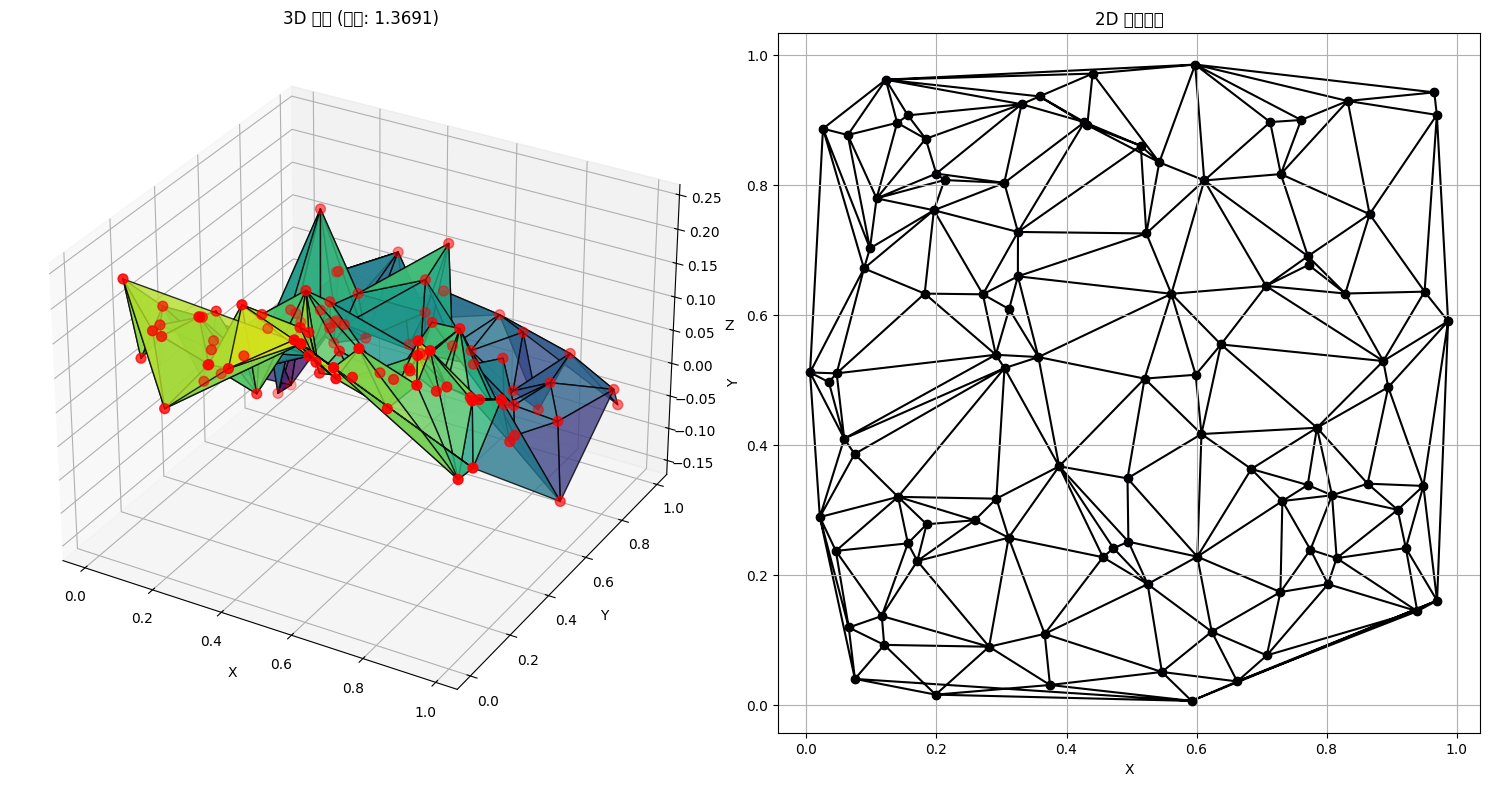

点集已保存为points.csv


In [27]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_surface_area(points):
    """
    计算三维点集的表面积（点集趋近于平面）
    
    参数:
        points: 三维点集，形状为(n, 3)的numpy数组
        
    返回:
        total_area: 表面积
        triangles: 三角剖分结果（索引数组）
    """
    # 1. 检查点集是否共面（近似）
    if not is_nearly_coplanar(points):
        print("警告：点集不严格共面，结果将是近似值")
    
    # 2. 找到最佳投影平面（使用PCA）
    projected_points, normal_vector = project_to_2d(points)
    
    # 3. 在二维投影上进行Delaunay三角剖分
    tri = Delaunay(projected_points)
    
    # 4. 提取三角形索引
    triangles = tri.simplices
    
    # 5. 计算每个三角形的面积（使用三维坐标）
    total_area = 0.0
    for triangle in triangles:
        # 获取三角形的三个顶点
        A, B, C = points[triangle]
        
        # 计算向量AB和AC
        AB = B - A
        AC = C - A
        
        # 计算叉积（法向量）
        cross_product = np.cross(AB, AC)
        
        # 计算三角形面积（叉积模长的一半）
        area = 0.5 * np.linalg.norm(cross_product)
        total_area += area
    
    return total_area, triangles

def is_nearly_coplanar(points, tolerance=1e-6):
    """
    检查点集是否近似共面
    """
    if len(points) < 4:
        return True  # 3个或更少的点总是共面
    
    # 计算协方差矩阵
    centered = points - np.mean(points, axis=0)
    covariance = np.cov(centered, rowvar=False)
    
    # 计算特征值
    eigenvalues = np.linalg.eigvalsh(covariance)
    
    # 最小特征值接近0表示共面
    return eigenvalues[0] < tolerance

def project_to_2d(points):
    """
    使用PCA将三维点投影到最佳二维平面
    """
    # 中心化数据
    centroid = np.mean(points, axis=0)
    centered_points = points - centroid
    
    # 计算协方差矩阵
    covariance = np.cov(centered_points, rowvar=False)
    
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    
    # 获取主成分（按特征值降序排列）
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # 前两个主成分定义投影平面
    basis = eigenvectors[:, :2]
    normal_vector = eigenvectors[:, 2]  # 法向量（第三个主成分）
    
    # 投影到二维平面
    projected_points = centered_points @ basis
    
    return projected_points, normal_vector

def visualize_results(points, triangles, area):
    """
    可视化点集和三角剖分结果
    """
    fig = plt.figure(figsize=(15, 10))
    
    # 3D可视化
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], 
                    triangles=triangles, 
                    alpha=0.8, 
                    cmap='viridis',
                    edgecolor='k')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], 
               c='red', s=50, depthshade=True)
    ax1.set_title(f'3D 表面 (面积: {area:.4f})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # 二维投影可视化
    ax2 = fig.add_subplot(122)
    ax2.triplot(points[:, 0], points[:, 1], triangles, 'ko-')
    ax2.scatter(points[:, 0], points[:, 1], c='blue', s=30)
    ax2.set_title('2D 三角剖分')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_aspect('equal')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def generate_sample_points(shape='plane', num_points=50):
    """
    生成样本点集（趋近于平面）
    """
    np.random.seed(42)
    
    if shape == 'plane':
        # 完美平面
        x = np.random.rand(num_points)
        y = np.random.rand(num_points)
        z = 0.1 * np.random.randn(num_points)  # 添加微小噪声
        points = np.vstack([x, y, z]).T
    
    elif shape == 'curved':
        # 轻微弯曲的曲面
        x = np.random.rand(num_points)
        y = np.random.rand(num_points)
        z = 0.1 * (np.sin(3*x) + np.cos(3*y)) + 0.05 * np.random.randn(num_points)
        points = np.vstack([x, y, z]).T
    
    elif shape == 'terrain':
        # 地形状表面
        x = np.linspace(0, 1, int(np.sqrt(num_points)))
        y = np.linspace(0, 1, int(np.sqrt(num_points)))
        x, y = np.meshgrid(x, y)
        x = x.flatten()
        y = y.flatten()
        z = 0.1 * (np.sin(5*x) * np.cos(5*y)) + 0.02 * np.random.randn(len(x))
        points = np.vstack([x, y, z]).T
    
    else:
        raise ValueError("未知形状类型")
    
    return points

# 主程序
if __name__ == "__main__":
    # 生成样本点集（趋近于平面）
    points = generate_sample_points(shape='curved', num_points=100)
    
    print(f"点集大小: {points.shape[0]} points")
    
    # 计算表面积
    area, triangles = calculate_surface_area(points)
    print(f"计算表面积: {area:.6f}")
    
    # 可视化结果
    visualize_results(points, triangles, area)
    
    # 保存结果
    np.savetxt("points.csv", points, delimiter=",", header="x,y,z")
    print("点集已保存为points.csv")

点集大小: 100 points
自动估计的最小三角形面积阈值: 0.000631
警告：点集不严格共面，结果将是近似值
总三角形数: 189
有效三角形数: 173 (面积 ≥ 0.0006306607593296879)
过滤三角形数: 16 (面积 < 0.0006306607593296879)
计算表面积: 0.588714


C:\Users\1\AppData\Local\Temp\ipykernel_23732\139208317.py:184: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\139208317.py:184: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\139208317.py:184: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\139208317.py:184: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\139208317.py:184: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_23732\139208317.py:184: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-

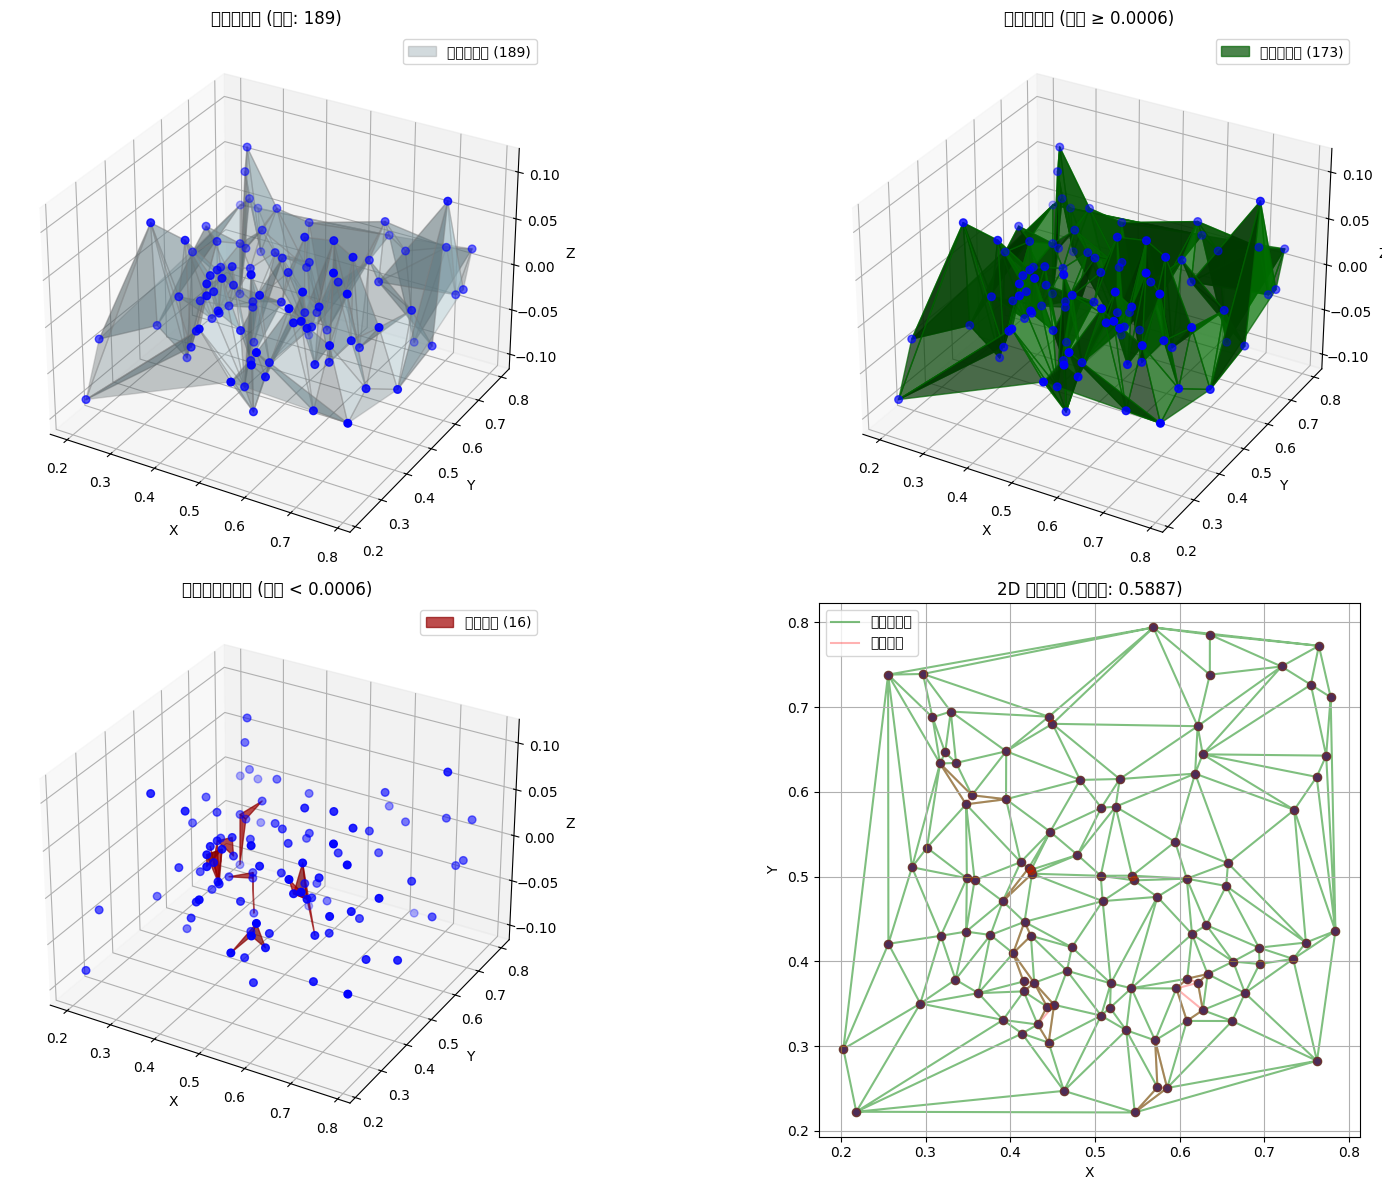

In [49]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_surface_area(points, min_triangle_area=0.0):
    """
    计算三维点集的表面积（点集趋近于平面），可设置最小三角形面积阈值
    
    参数:
        points: 三维点集，形状为(n, 3)的numpy数组
        min_triangle_area: 最小三角形面积阈值，小于此值的三角形将被忽略
        
    返回:
        total_area: 表面积
        triangles: 三角剖分结果（索引数组）
        valid_triangles: 有效的三角形索引（面积大于阈值的）
    """
    # 1. 检查点集是否共面（近似）
    if not is_nearly_coplanar(points):
        print("警告：点集不严格共面，结果将是近似值")
    
    # 2. 找到最佳投影平面（使用PCA）
    projected_points, normal_vector = project_to_2d(points)
    
    # 3. 在二维投影上进行Delaunay三角剖分
    tri = Delaunay(projected_points)
    
    # 4. 提取三角形索引
    all_triangles = tri.simplices
    
    # 5. 计算每个三角形的面积（使用三维坐标），并过滤小三角形
    total_area = 0.0
    valid_triangles = []
    small_triangles = []
    
    for triangle in all_triangles:
        # 获取三角形的三个顶点
        A, B, C = points[triangle]
        
        # 计算向量AB和AC
        AB = B - A
        AC = C - A
        
        # 计算叉积（法向量）
        cross_product = np.cross(AB, AC)
        
        # 计算三角形面积（叉积模长的一半）
        area = 0.5 * np.linalg.norm(cross_product)
        
        # 检查面积是否大于阈值
        if area >= min_triangle_area:
            total_area += area
            valid_triangles.append(triangle)
        else:
            small_triangles.append(triangle)
    
    # 转换为numpy数组
    valid_triangles = np.array(valid_triangles) if valid_triangles else np.array([])
    small_triangles = np.array(small_triangles) if small_triangles else np.array([])
    
    # 打印统计信息
    print(f"总三角形数: {len(all_triangles)}")
    print(f"有效三角形数: {len(valid_triangles)} (面积 ≥ {min_triangle_area})")
    print(f"过滤三角形数: {len(small_triangles)} (面积 < {min_triangle_area})")
    
    return total_area, all_triangles, valid_triangles, small_triangles

def is_nearly_coplanar(points, tolerance=1e-6):
    """
    检查点集是否近似共面
    """
    if len(points) < 4:
        return True  # 3个或更少的点总是共面
    
    # 计算协方差矩阵
    centered = points - np.mean(points, axis=0)
    covariance = np.cov(centered, rowvar=False)
    
    # 计算特征值
    eigenvalues = np.linalg.eigvalsh(covariance)
    
    # 最小特征值接近0表示共面
    return eigenvalues[0] < tolerance

def project_to_2d(points):
    """
    使用PCA将三维点投影到最佳二维平面
    """
    # 中心化数据
    centroid = np.mean(points, axis=0)
    centered_points = points - centroid
    
    # 计算协方差矩阵
    covariance = np.cov(centered_points, rowvar=False)
    
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    
    # 获取主成分（按特征值降序排列）
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # 前两个主成分定义投影平面
    basis = eigenvectors[:, :2]
    normal_vector = eigenvectors[:, 2]  # 法向量（第三个主成分）
    
    # 投影到二维平面
    projected_points = centered_points @ basis
    
    return projected_points, normal_vector

def visualize_results(points, all_triangles, valid_triangles, small_triangles, area, min_triangle_area):
    """
    可视化点集和三角剖分结果，区分有效三角形和小三角形
    """
    fig = plt.figure(figsize=(18, 12))
    
    # 3D可视化 - 所有三角形
    ax1 = fig.add_subplot(221, projection='3d')
    if len(all_triangles) > 0:
        ax1.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], 
                        triangles=all_triangles, 
                        alpha=0.3, 
                        color='lightblue',
                        edgecolor='gray',
                        label=f'所有三角形 ({len(all_triangles)})')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], 
               c='blue', s=30, depthshade=True)
    ax1.set_title(f'所有三角形 (总数: {len(all_triangles)})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()
    
    # 3D可视化 - 有效三角形
    ax2 = fig.add_subplot(222, projection='3d')
    if len(valid_triangles) > 0:
        ax2.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], 
                        triangles=valid_triangles, 
                        alpha=0.7, 
                        color='green',
                        edgecolor='darkgreen',
                        label=f'有效三角形 ({len(valid_triangles)})')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], 
               c='blue', s=30, depthshade=True)
    ax2.set_title(f'有效三角形 (面积 ≥ {min_triangle_area:.4f})')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()
    
    # 3D可视化 - 小三角形
    ax3 = fig.add_subplot(223, projection='3d')
    if len(small_triangles) > 0:
        ax3.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], 
                        triangles=small_triangles, 
                        alpha=0.7, 
                        color='red',
                        edgecolor='darkred',
                        label=f'小三角形 ({len(small_triangles)})')
    ax3.scatter(points[:, 0], points[:, 1], points[:, 2], 
               c='blue', s=30, depthshade=True)
    ax3.set_title(f'过滤的小三角形 (面积 < {min_triangle_area:.4f})')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.legend()
    
    # 二维投影可视化
    ax4 = fig.add_subplot(224)
    if len(valid_triangles) > 0:
        ax4.triplot(points[:, 0], points[:, 1], valid_triangles, 'go-', alpha=0.5, label='有效三角形')
    if len(small_triangles) > 0:
        ax4.triplot(points[:, 0], points[:, 1], small_triangles, 'ro-', alpha=0.3, label='小三角形')
    ax4.scatter(points[:, 0], points[:, 1], c='blue', s=30)
    ax4.set_title(f'2D 三角剖分 (总面积: {area:.4f})')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_aspect('equal')
    ax4.grid(True)
    ax4.legend()
    
    plt.tight_layout()
    plt.show()

def generate_sample_points(shape='plane', num_points=50, noise_level=0.05):
    """
    生成样本点集（趋近于平面），可控制噪声水平
    """
    np.random.seed(42)
    
    if shape == 'plane':
        # 完美平面
        x = np.random.rand(num_points)
        y = np.random.rand(num_points)
        z = noise_level * np.random.randn(num_points)  # 添加噪声
        points = np.vstack([x, y, z]).T
    
    elif shape == 'curved':
        # 轻微弯曲的曲面
        x = np.random.rand(num_points)
        y = np.random.rand(num_points)
        z = 0.1 * (np.sin(3*x) + np.cos(3*y)) + noise_level * np.random.randn(num_points)
        points = np.vstack([x, y, z]).T
    
    elif shape == 'terrain':
        # 地形状表面
        grid_size = int(np.sqrt(num_points))
        x = np.linspace(0, 1, grid_size)
        y = np.linspace(0, 1, grid_size)
        x, y = np.meshgrid(x, y)
        x = x.flatten()
        y = y.flatten()
        z = 0.1 * (np.sin(5*x) * np.cos(5*y)) + noise_level * np.random.randn(len(x))
        points = np.vstack([x, y, z]).T
    
    elif shape == 'sparse_dense':
        # 稀疏和密集区域混合
        points = []
        # 密集区域
        for _ in range(num_points//2):
            x, y = np.random.rand(2)*0.4 + 0.3
            z = noise_level * np.random.randn()
            points.append([x, y, z])
        # 稀疏区域
        for _ in range(num_points//2):
            x, y = np.random.rand(2)*0.6 + 0.2
            z = noise_level * np.random.randn()
            points.append([x, y, z])
        points = np.array(points)
    
    else:
        raise ValueError("未知形状类型")
    
    return points

def estimate_min_triangle_area(points, percentile=5):
    """
    估计合适的最小三角形面积阈值（基于点集特性）
    """
    # 计算点之间的平均距离
    from scipy.spatial.distance import pdist
    distances = pdist(points)
    avg_distance = np.mean(distances)
    
    # 计算点集的包围盒大小
    bbox_size = np.ptp(points, axis=0)
    bbox_area = bbox_size[0] * bbox_size[1]
    
    # 估计平均三角形面积（经验公式）
    avg_triangle_area = (avg_distance ** 2) * np.sqrt(3) / 4
    
    # 使用百分位数确定阈值
    return avg_triangle_area * (percentile / 100)

# 主程序
if __name__ == "__main__":
    # 生成样本点集（趋近于平面）
    points = generate_sample_points(shape='sparse_dense', num_points=100, noise_level=0.05)
    
    print(f"点集大小: {points.shape[0]} points")
    
    # 自动估计最小三角形面积阈值
    min_area = estimate_min_triangle_area(points, percentile=2)
    print(f"自动估计的最小三角形面积阈值: {min_area:.6f}")
    
    # 计算表面积（使用面积阈值）
    area, all_tri, valid_tri, small_tri = calculate_surface_area(
        points, 
        min_triangle_area=min_area
    )
    
    print(f"计算表面积: {area:.6f}")
    
    # 可视化结果
    visualize_results(points, all_tri, valid_tri, small_tri, area, min_area)
    
    # # 保存结果
    # np.savetxt("points.csv", points, delimiter=",", header="x,y,z")
    # print("点集已保存为points.csv")